In [ ]:
import pandas as pd
import csv

#load the data
df = pd.read_csv('/content/apartment_listings.csv', encoding='latin1')

# Display the first 5 rows
print('First 5 rows of the DataFrame:')
print(df.head())

First 5 rows of the DataFrame:
           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   


In [ ]:
#dimension of the dataframe:
print('Dimension of the DataFrame:')
print(df.shape)

Dimension of the DataFrame:
(10000, 22)


In [ ]:
# Check data types
print('\nData types of each column:')
df.info()


Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non

In [ ]:
# Generate descriptive statistics for numerical columns:
print('\nDescriptive statistics for numerical columns:')
print(df.describe())


Descriptive statistics for numerical columns:
                 id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.381597     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.611299     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.000000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850 

# NULL value analysis

In [ ]:
print('\nNull values in each column:')
print(df.isnull().sum())


Null values in each column:
id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64


In [ ]:
#preprocessing: null checks:
#for na in pets -> putting no pets
df['pets_allowed'] = df['pets_allowed'].fillna('No Pets')
df['amenities'] = df['amenities'].fillna('No amenities')

# DROP ADDRESS COLUMN:
df = df.drop(columns=['address'])

# REPLACE THE NULL VALUES IN NUMERICAL WITH MEDIAN:
df['square_feet'] = df['square_feet'].fillna(df['square_feet'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['latitude'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['longitude'] = df['bedrooms'].fillna(df['bedrooms'].median())

#DROP ROWS WHICH HAVE NULL CITY NAME OR STATE NAME:
df = df.dropna(subset=['cityname', 'state'])

In [ ]:
#CHECK FOR NULL VALUES:
print('\nNull values in each column:')
print(df.isnull().sum())

#SIZE OF THE DATASET NOW:
print('Dimension of the DataFrame:')
print(df.shape)


Null values in each column:
id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
state            0
latitude         0
longitude        0
source           0
time             0
dtype: int64
Dimension of the DataFrame:
(9923, 21)


# EDA

## Bedroom

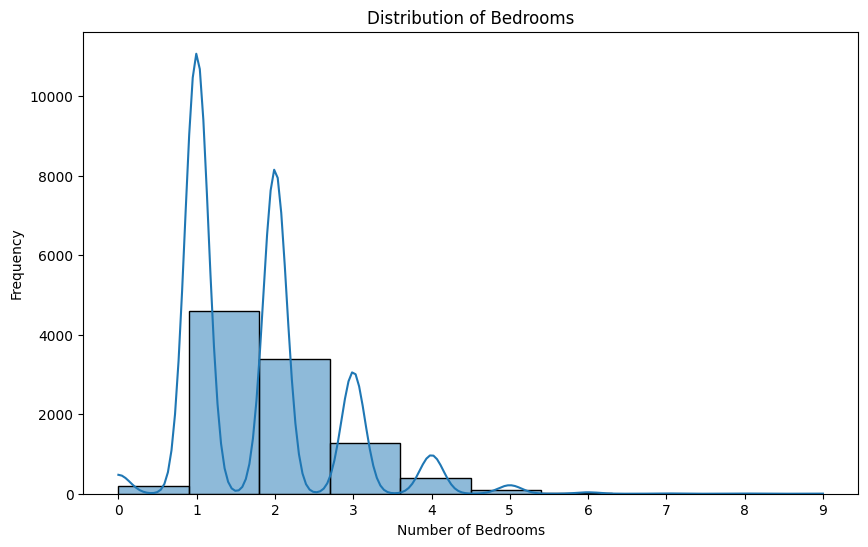

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bedrooms'].dropna(), bins=df['bedrooms'].nunique(), kde=True)
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 1))
plt.show()

In [ ]:
avg_price_by_bedrooms = df.dropna(subset=['bedrooms']).groupby('bedrooms')['price'].mean().reset_index()

print('Average rental price by number of bedrooms:')
print(avg_price_by_bedrooms)

Average rental price by number of bedrooms:
   bedrooms        price
0       0.0  1650.888889
1       1.0  1237.844150
2       2.0  1523.411713
3       3.0  1775.543887
4       4.0  2316.779703
5       5.0  3547.258427
6       6.0  6166.666667
7       7.0  7351.666667
8       8.0  6172.500000
9       9.0  3195.000000


In [ ]:
avg_price_by_bedrooms['price_change'] = avg_price_by_bedrooms['price'].diff()

print('\nAverage rent increase associated with adding one additional bedroom:')
print(avg_price_by_bedrooms)



Average rent increase associated with adding one additional bedroom:
   bedrooms        price  price_change
0       0.0  1650.888889           NaN
1       1.0  1237.844150   -413.044739
2       2.0  1523.411713    285.567563
3       3.0  1775.543887    252.132174
4       4.0  2316.779703    541.235816
5       5.0  3547.258427   1230.478724
6       6.0  6166.666667   2619.408240
7       7.0  7351.666667   1185.000000
8       8.0  6172.500000  -1179.166667
9       9.0  3195.000000  -2977.500000


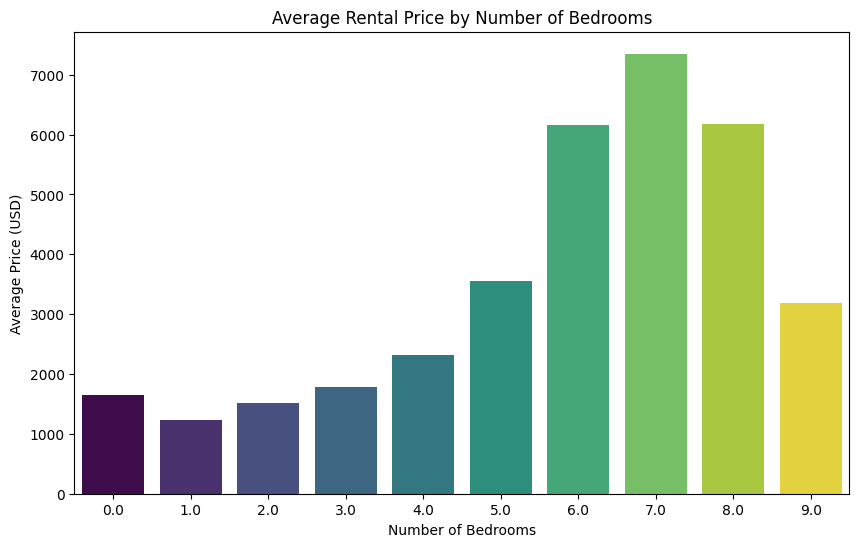

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis', hue='bedrooms', legend=False)
plt.title('Average Rental Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (USD)')
plt.show()

## Bathroom

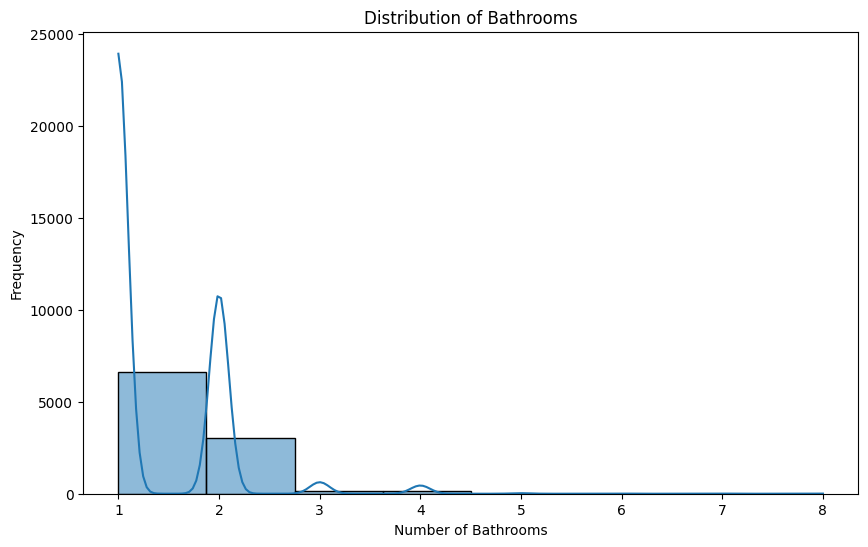

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bathrooms'].dropna(), bins=df['bathrooms'].nunique(), kde=True)
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.xticks(range(int(df['bathrooms'].min()), int(df['bathrooms'].max()) + 1))
plt.show()

## Cities

In [ ]:
print('Top 20 most frequent cities:')
print(df['cityname'].value_counts().head(20))

Top 20 most frequent cities:
cityname
Austin              523
Dallas              216
Houston             186
San Antonio         182
Los Angeles         165
Chicago             148
Madison             121
Portland            113
Denver              105
San Francisco       104
Kansas City         100
Arlington            90
Seattle              87
Cincinnati           86
Washington           84
Las Vegas            81
Colorado Springs     81
Omaha                75
Raleigh              74
Ames                 73
Name: count, dtype: int64


## Amenities

In [ ]:
df['amenities'] = df['amenities'].fillna('')
all_amenities = set()
for amenity_list in df['amenities']:
    if amenity_list:
        for amenity in amenity_list.split(','):
            all_amenities.add(amenity.strip())

print(f"Number of unique amenities found: {len(all_amenities)}")
print("First 10 unique amenities:")
for i, amenity in enumerate(list(all_amenities)[:10]):
    print(f"- {amenity}")

Number of unique amenities found: 27
First 10 unique amenities:
- Tennis
- Washer Dryer
- Wood Floors
- Patio/Deck
- Gym
- Gated
- Elevator
- Parking
- Alarm
- Playground


In [ ]:
from collections import Counter

amenity_counts = Counter()
for amenity_list in df['amenities']:
    if amenity_list:
        for amenity in amenity_list.split(','):
            amenity_counts[amenity.strip()] += 1

# Get the top 15 most frequent amenities
top_n_amenities = 15
most_common_amenities = [amenity for amenity, count in amenity_counts.most_common(top_n_amenities)]

print(f"Top {top_n_amenities} most common amenities:")
for amenity, count in amenity_counts.most_common(top_n_amenities):
    print(f"- {amenity}: {count}")

Top 15 most common amenities:
- Parking: 3727
- Dishwasher: 3266
- Pool: 3238
- Refrigerator: 3133
- Patio/Deck: 2472
- Cable or Satellite: 1678
- Storage: 1531
- Gym: 1469
- Internet Access: 1441
- Clubhouse: 1317
- Garbage Disposal: 1210
- Washer Dryer: 1077
- Fireplace: 1065
- Playground: 782
- AC: 662


In [ ]:
for amenity in most_common_amenities:
    df[f'has_{amenity.lower().replace(" ", "_")}'] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)

print(f"Added binary columns for {len(most_common_amenities)} amenities. Displaying the first 5 rows with new columns:")
print(df[["id", "amenities"] + [f'has_{a.lower().replace(" ", "_")}' for a in most_common_amenities]].head())

Added binary columns for 15 amenities. Displaying the first 5 rows with new columns:
           id amenities  has_parking  has_dishwasher  has_pool  \
0  5668626895                      0               0         0   
1  5664597177                      0               0         0   
2  5668626833                      0               0         0   
3  5659918074                      0               0         0   
4  5668626759                      0               0         0   

   has_refrigerator  has_patio/deck  has_cable_or_satellite  has_storage  \
0                 0               0                       0            0   
1                 0               0                       0            0   
2                 0               0                       0            0   
3                 0               0                       0            0   
4                 0               0                       0            0   

   has_gym  has_internet_access  has_clubhouse  has_garbage_d

In [ ]:
amenity_price_impact = []
for amenity in most_common_amenities:
    col_name = f'has_{amenity.lower().replace(" ", "_")}'
    avg_price_with_amenity = df[df[col_name] == 1]['price'].mean()
    avg_price_without_amenity = df[df[col_name] == 0]['price'].mean()
    price_difference = avg_price_with_amenity - avg_price_without_amenity
    amenity_price_impact.append({
        'Amenity': amenity,
        'Avg_Price_With': avg_price_with_amenity,
        'Avg_Price_Without': avg_price_without_amenity,
        'Price_Difference': price_difference
    })

amenity_price_impact_df = pd.DataFrame(amenity_price_impact)
print('Average rental prices with and without amenities and their differences:')
print(amenity_price_impact_df.sort_values(by='Price_Difference', ascending=False))


Average rental prices with and without amenities and their differences:
               Amenity  Avg_Price_With  Avg_Price_Without  Price_Difference
14                  AC     1521.419940        1483.786143         37.633797
7                  Gym     1498.393465        1484.191185         14.202280
11        Washer Dryer     1473.994429        1487.760058        -13.765629
12           Fireplace     1391.410329        1497.585115       -106.174786
6              Storage     1377.276290        1505.982406       -128.706116
3         Refrigerator     1379.393872        1535.042085       -155.648214
1           Dishwasher     1367.707900        1543.783932       -176.076033
8      Internet Access     1324.814712        1513.461503       -188.646791
0              Parking     1367.189697        1557.031564       -189.841867
4           Patio/Deck     1341.294094        1533.886291       -192.592197
9            Clubhouse     1290.712225        1515.939998       -225.227773
2               

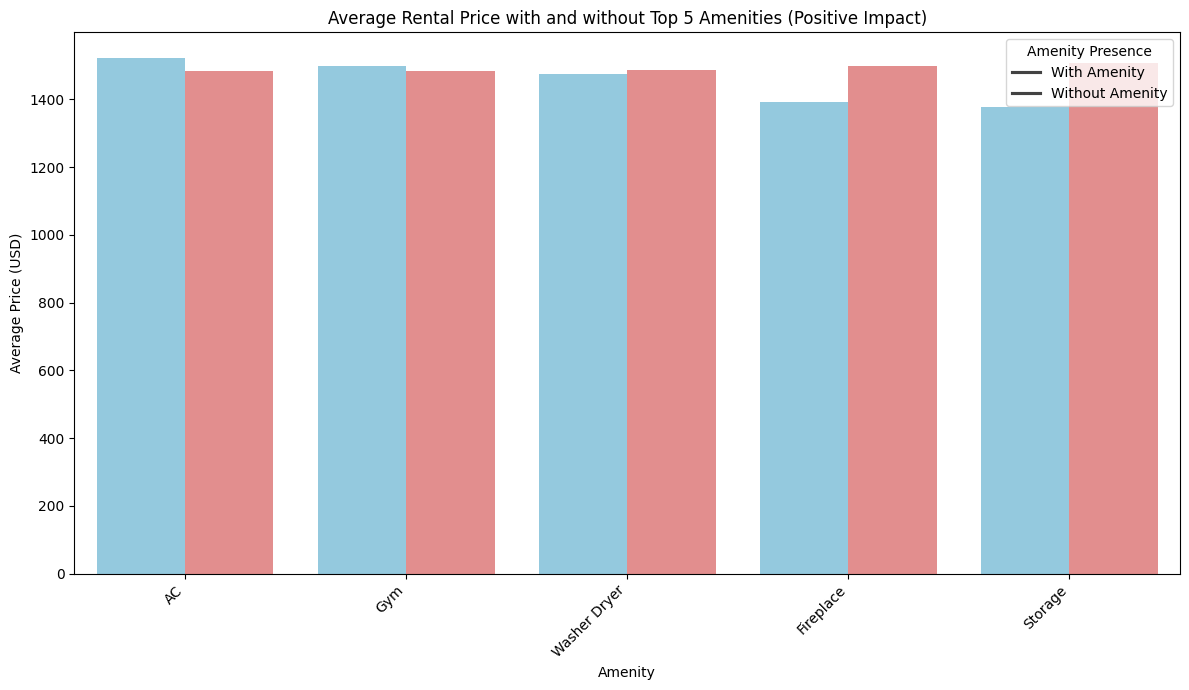

In [ ]:
top_5_positive_impact_amenities = amenity_price_impact_df.sort_values(by='Price_Difference', ascending=False).head(5)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_5_positive_impact_amenities.melt(id_vars=['Amenity'], value_vars=['Avg_Price_With', 'Avg_Price_Without'], var_name='Amenity_Presence', value_name='Average_Price'),
    x='Amenity',
    y='Average_Price',
    hue='Amenity_Presence',
    palette={'Avg_Price_With': 'skyblue', 'Avg_Price_Without': 'lightcoral'}
)
plt.title('Average Rental Price with and without Top 5 Amenities (Positive Impact)')
plt.xlabel('Amenity')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Amenity Presence', labels=['With Amenity', 'Without Amenity'])
plt.tight_layout()
plt.show()

## Pet Policy

/tmp/ipython-input-2488792020.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pets_allowed', y='price', data=df, palette='viridis')


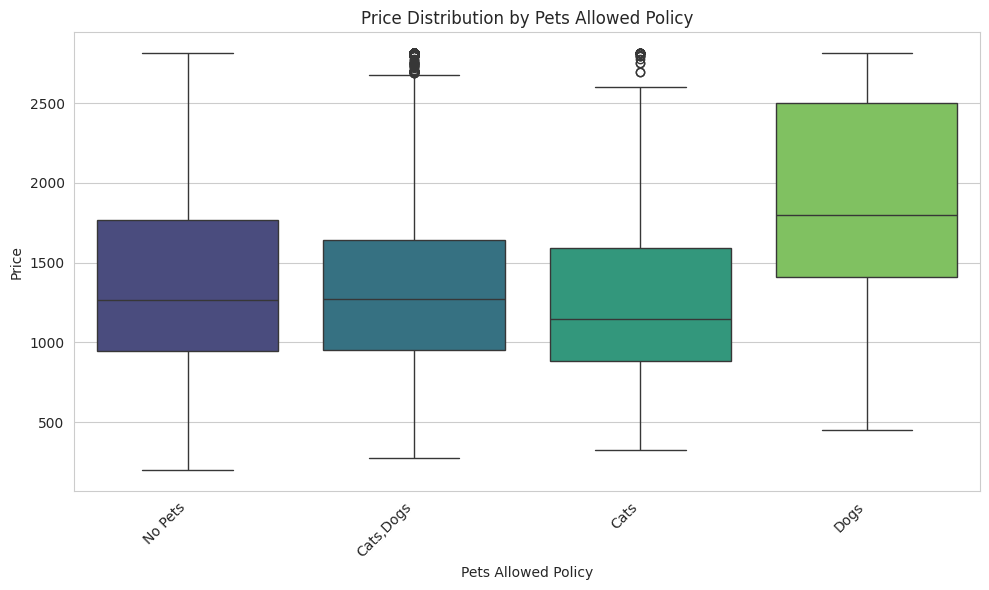

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='pets_allowed', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Pets Allowed Policy')
plt.xlabel('Pets Allowed Policy')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Create a new simplified 'pets_allowed_grouped' column
df['pets_allowed_grouped'] = df['pets_allowed'].apply(lambda x: 'Pets Allowed' if x in ['Cats', 'Dogs', 'Cats,Dogs'] else 'No Pets')

# Display the value counts for the new column to verify
print(df['pets_allowed_grouped'].value_counts())

pets_allowed_grouped
Pets Allowed    5789
No Pets         4134
Name: count, dtype: int64


/tmp/ipython-input-2860829134.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pets_allowed_grouped', y='price', data=df, palette='viridis')


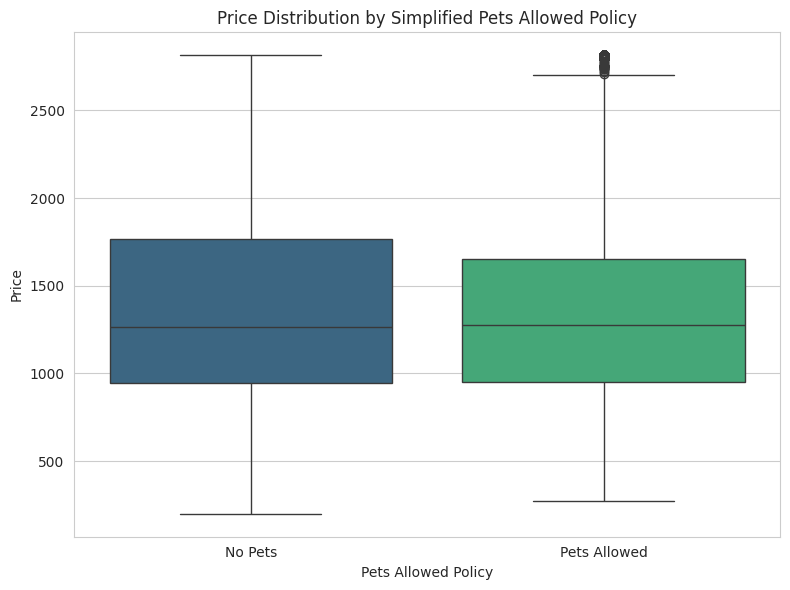

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='pets_allowed_grouped', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Simplified Pets Allowed Policy')
plt.xlabel('Pets Allowed Policy')
plt.ylabel('Price')
plt.xticks(rotation=0) # No rotation needed for two categories
plt.tight_layout()
plt.show()

In [ ]:
average_price_by_pets = df.groupby('pets_allowed_grouped')['price'].mean().reset_index()

print("Average price by pets allowed policy:")
display(average_price_by_pets)

Average price by pets allowed policy:


,pets_allowed_grouped,price
0,No Pets,1426.507257
1,Pets Allowed,1384.561064


#OUTLIEAR ANALYSIS

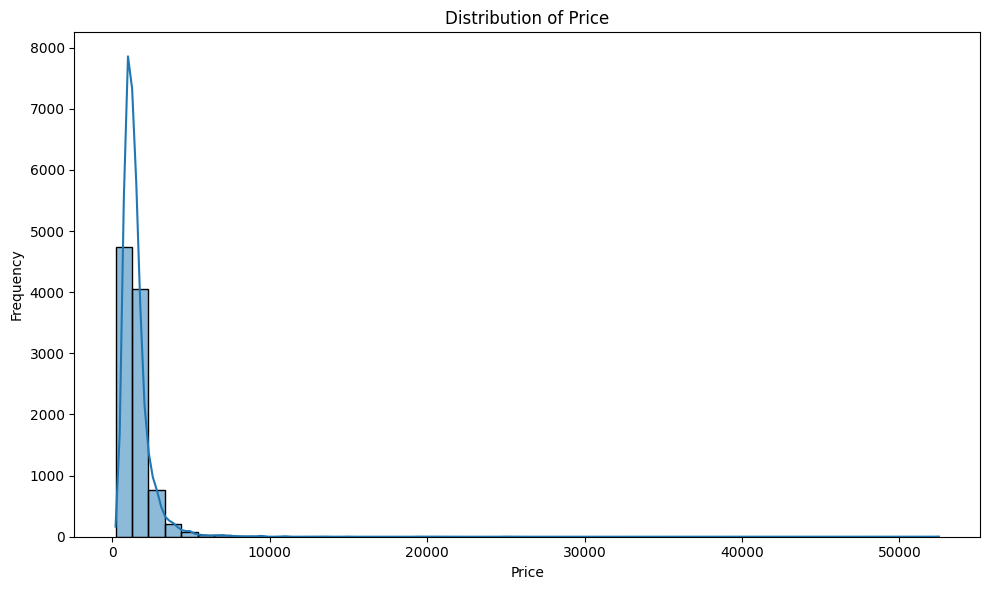

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical columns for outlier analysis
outlier_columns = ['price', 'square_feet', 'bathrooms', 'bedrooms']

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    print(f"\n--- Outlier Analysis for '{col}' ---")
    print(f"Q1: {Q1:.2f}")
    print(f"Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of Outliers: {outlier_count}")


--- Outlier Analysis for 'price' ---
Q1: 949.00
Q3: 1695.00
IQR: 746.00
Lower Bound: -170.00
Upper Bound: 2814.00
Number of Outliers: 613

--- Outlier Analysis for 'square_feet' ---
Q1: 649.00
Q3: 1100.00
IQR: 451.00
Lower Bound: -27.50
Upper Bound: 1776.50
Number of Outliers: 619

--- Outlier Analysis for 'bathrooms' ---
Q1: 1.00
Q3: 2.00
IQR: 1.00
Lower Bound: -0.50
Upper Bound: 3.50
Number of Outliers: 138

--- Outlier Analysis for 'bedrooms' ---
Q1: 1.00
Q3: 2.00
IQR: 1.00
Lower Bound: -0.50
Upper Bound: 3.50
Number of Outliers: 510


In [ ]:
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Count outliers before capping
outliers_before = df[df['price'] > upper_bound_price].shape[0]
print(f"Number of outliers above upper bound before capping: {outliers_before}")
# Cap the 'price' column
df['price'] = np.where(df['price'] > upper_bound_price, upper_bound_price, df['price'])

# Count outliers after capping (should be 0 for upper bound)
outliers_after = df[df['price'] > upper_bound_price].shape[0]

print(f"Q1 (price): {Q1_price:.2f}")
print(f"Q3 (price): {Q3_price:.2f}")
print(f"IQR (price): {IQR_price:.2f}")
print(f"Upper Bound (price): {upper_bound_price:.2f}")
print(f"Number of outliers above upper bound before capping: {outliers_before}")
print(f"Number of outliers above upper bound after capping: {outliers_after}")
print(f"Min price after capping: {df['price'].min():.2f}")
print(f"Max price after capping: {df['price'].max():.2f}")

Q1 (price): 949.00
Q3 (price): 1695.00
IQR (price): 746.00
Upper Bound (price): 2814.00
Number of outliers above upper bound before capping: 613
Number of outliers above upper bound after capping: 0
Min price after capping: 200.00
Max price after capping: 2814.00


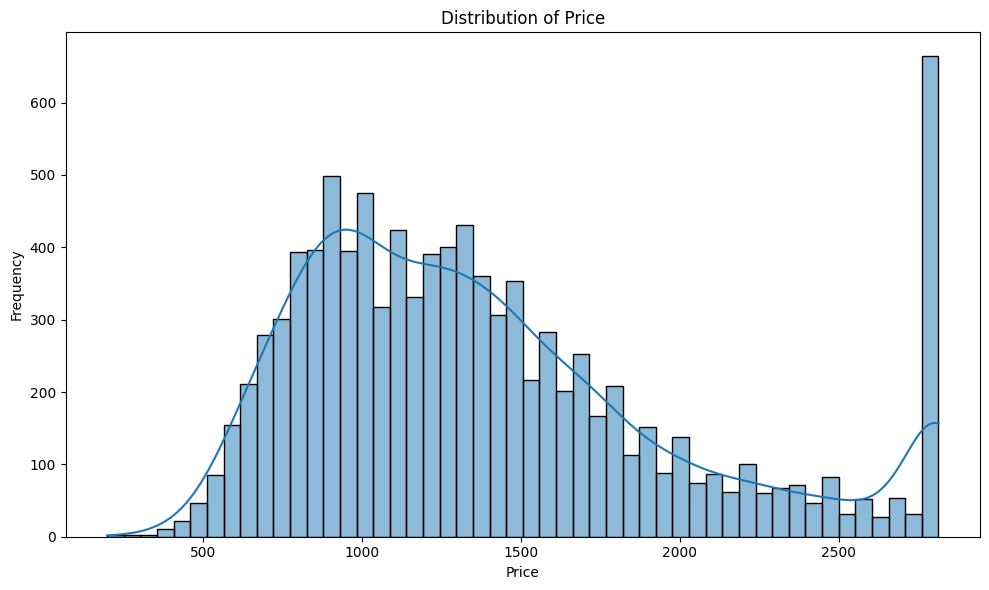

In [ ]:
#distribution of price:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Models

In [ ]:
model_numerical_features = ['bathrooms', 'square_feet', 'latitude', 'longitude', 'bedrooms']
model_categorical_features = ['has_photo', 'pets_allowed', 'state', 'cityname']

print("Model numerical features:", model_numerical_features)
print("Model categorical features:", model_categorical_features)

Model numerical features: ['bathrooms', 'square_feet', 'latitude', 'longitude', 'bedrooms']
Model categorical features: ['has_photo', 'pets_allowed', 'state', 'cityname']


In [ ]:
# standar normal for numerical columns:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[model_numerical_features] = scaler.fit_transform(df[model_numerical_features])

In [ ]:
X_numerical = df[model_numerical_features]

X_categorical = pd.get_dummies(df[model_categorical_features], drop_first=True)

target = 'price'

In [ ]:
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7938, 1633)
Shape of X_test: (1985, 1633)
Shape of y_train: (7938,)
Shape of y_test: (1985,)


In [ ]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate a new Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the calculated metrics
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.3579
Mean Absolute Error (MAE): 238.00
Root Mean Squared Error (RMSE): 482.90


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor model with a random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R-squared: {r2_rf:.4f}")
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf:.2f}")

Random Forest R-squared: 0.7315
Random Forest Mean Absolute Error (MAE): 216.30
Random Forest Root Mean Squared Error (RMSE): 312.29


In [ ]:
# decision tree model:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))




In [ ]:
print(f"Decision tree R-squared: {r2_dt:.4f}")
print(f"Decision tree Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Decision Root Mean Squared Error (RMSE): {rmse_dt:.2f}")

Decision tree R-squared: 0.6113
Decision tree Mean Absolute Error (MAE): 254.00
Decision Root Mean Squared Error (RMSE): 375.75


In [ ]:
# train a svr model:
from sklearn.svm import SVR

svr_model = SVR()

# Train the model using the training data
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))




In [ ]:
print(f"SVR R-squared: {r2_svr:.4f}")
print(f"SVR Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"SVR Root Mean Squared Error (RMSE): {rmse_svr:.2f}")

SVR R-squared: 0.1145
SVR Mean Absolute Error (MAE): 415.00
SVR Root Mean Squared Error (RMSE): 567.10


# Feature importance

In [ ]:
feature_importances = rf_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

display(importance_df)

,Feature,Importance
1,square_feet,0.318118
13,state_CA,0.214714
40,state_NJ,0.037617
28,state_MA,0.036976
56,state_WA,0.032215
...,...,...
441,cityname_Discovery Bay,0.000000
1299,cityname_Salisbury,0.000000
742,cityname_Kaukauna,0.000000
739,cityname_Kannapolis,0.000000


From the feature importances above, we can observe that `latitude`, `longitude`, `square_feet` and `bathrooms` are the most influential numerical features. Among the categorical features, the presence of `pets_allowed` (specifically for cats and dogs) also plays a significant role in determining the apartment price. On the other hand, the `has_photo_Yes` feature has a relatively low importance score, suggesting that simply having a photo might not be as critical a factor as other features in predicting the price.

/tmp/ipython-input-3237018498.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')


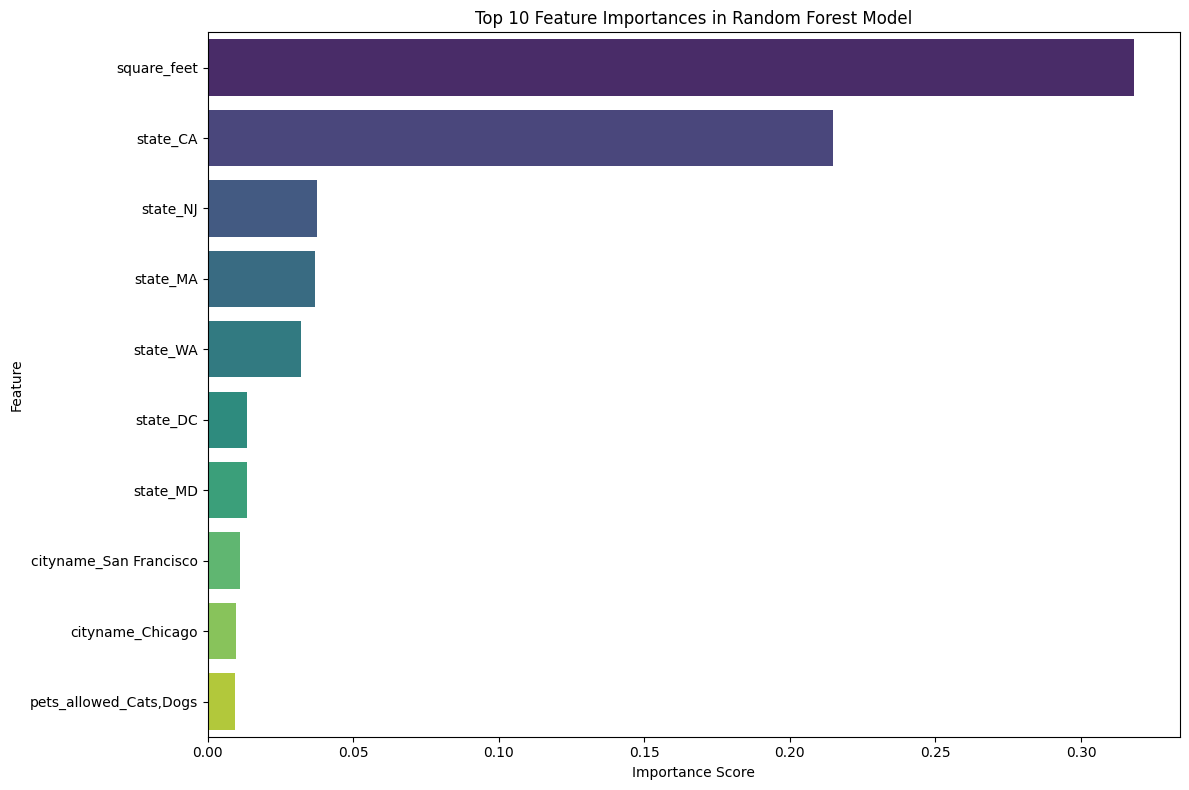

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N features (e.g., top 10)
top_n_features = 10
top_features_df = importance_df.head(top_n_features)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
plt.title(f'Top {top_n_features} Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2065292061.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=next_top_features_df, palette='viridis')


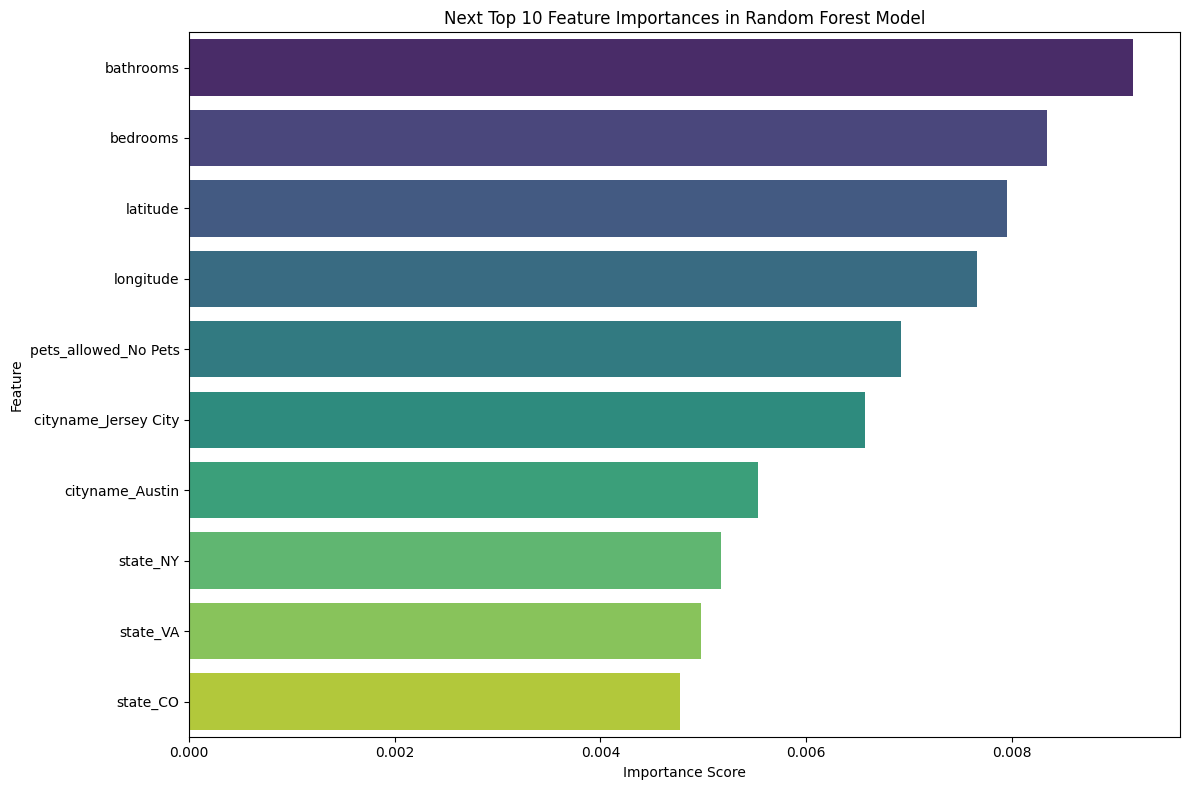

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the next top N features (from 11th to 20th)
next_top_n_features = 10
next_top_features_df = importance_df.iloc[top_n_features : top_n_features + next_top_n_features]

# Create a bar plot for the next top features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=next_top_features_df, palette='viridis')
plt.title(f'Next Top {next_top_n_features} Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2913656074.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=specific_features_df, palette='viridis')


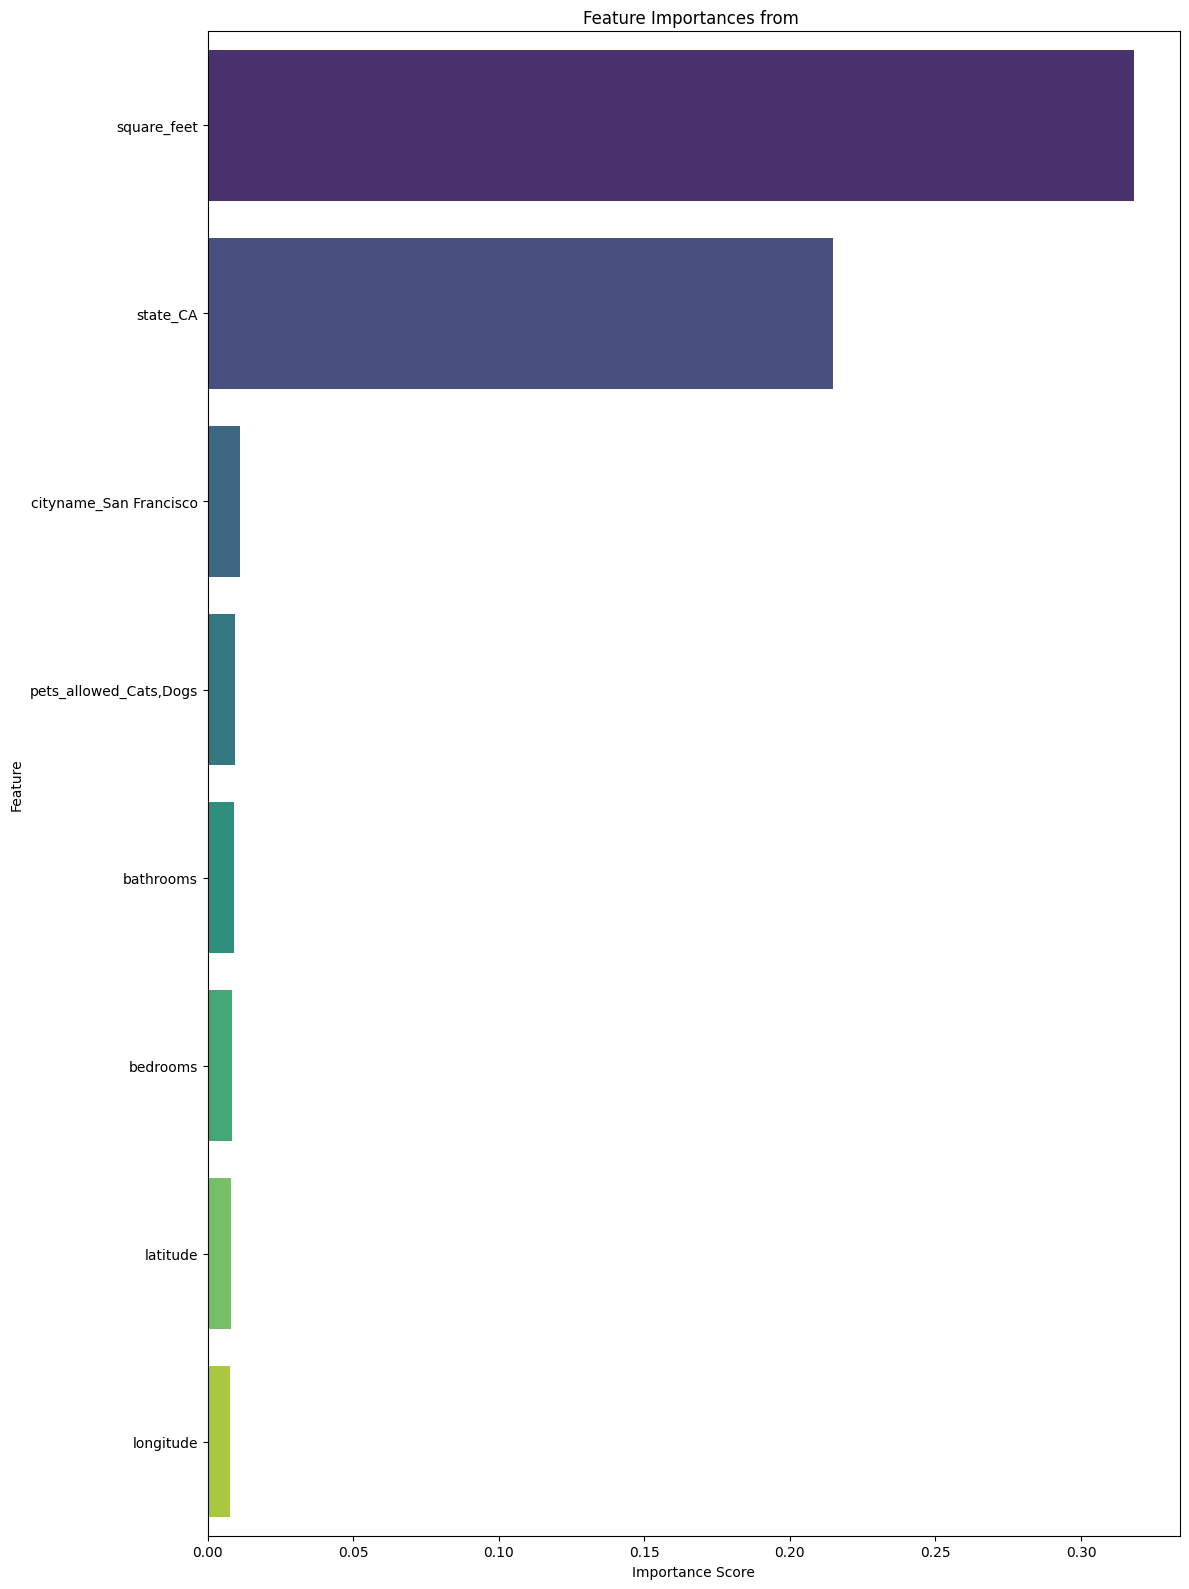

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the specific features to visualize
specific_features = [
    'square_feet',
    'state_CA',
    'cityname_San Francisco',
    'pets_allowed_Cats,Dogs',
    'bathrooms',
    'bedrooms',
    'latitude',
    'longitude'
]

# Filter the importance_df for the specific features
specific_features_df = importance_df[importance_df['Feature'].isin(specific_features)]

# Sort by importance for better visualization
specific_features_df = specific_features_df.sort_values(by='Importance', ascending=False)



# Create a bar plot
plt.figure(figsize=(12, 16))
ax = sns.barplot(x='Importance', y='Feature', data=specific_features_df, palette='viridis')
plt.title('Feature Importances from ')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

# performance evaluation

In [ ]:
import pandas as pd

# Collect the metrics for each model
performance_metrics = {
    'Linear Regression': {
        'R-squared': r2,
        'MAE': mae,
        'RMSE': rmse
    },
    'Random Forest': {
        'R-squared': r2_rf,
        'MAE': mae_rf,
        'RMSE': rmse_rf
    },
    'Decision Tree': {
        'R-squared': r2_dt,
        'MAE': mae_dt,
        'RMSE': rmse_dt
    },
    'SVR': {
        'R-squared': r2_svr,
        'MAE': mae_svr,
        'RMSE': rmse_svr
    }
}

# Convert the dictionary to a Pandas DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the DataFrame
print("Model Performance Metrics:")
print(performance_df)

Model Performance Metrics:
                   R-squared         MAE        RMSE
Linear Regression   0.357932  237.995124  482.898018
Random Forest       0.731474  216.299323  312.290211
Decision Tree       0.611254  253.996927  375.749048
SVR                 0.114508  414.997558  567.096969


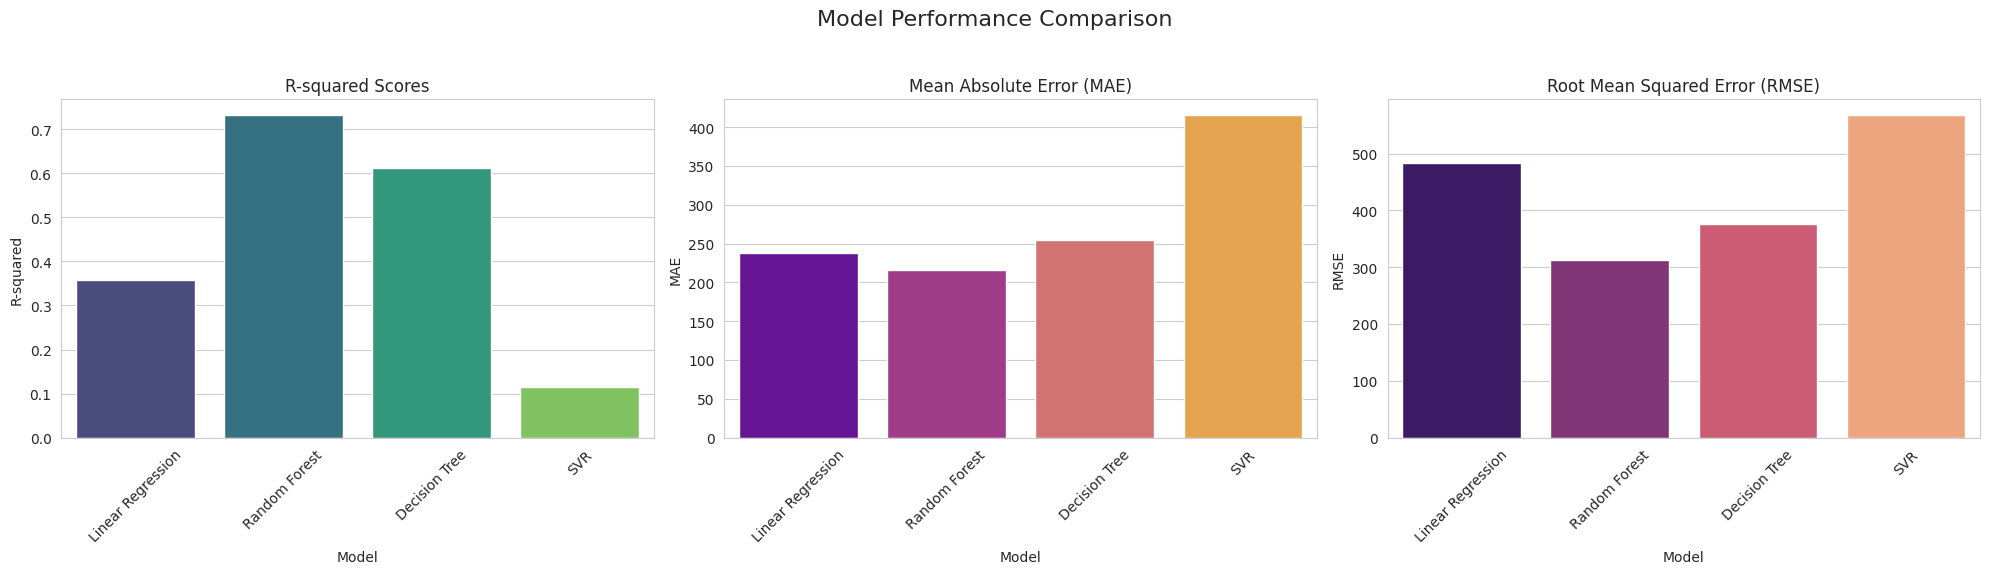

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Bar chart for R-squared
sns.barplot(x=performance_df.index, y='R-squared', data=performance_df, ax=axes[0], palette='viridis', hue=performance_df.index, legend=False)
axes[0].set_title('R-squared Scores')
axes[0].set_ylabel('R-squared')
axes[0].set_xlabel('Model')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for MAE
sns.barplot(x=performance_df.index, y='MAE', data=performance_df, ax=axes[1], palette='plasma', hue=performance_df.index, legend=False)
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')
axes[1].set_xlabel('Model')
axes[1].tick_params(axis='x', rotation=45)

# Bar chart for RMSE
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, ax=axes[2], palette='magma', hue=performance_df.index, legend=False)
axes[2].set_title('Root Mean Squared Error (RMSE)')
axes[2].set_ylabel('RMSE')
axes[2].set_xlabel('Model')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()